# Blood Plasma Data

In [1]:
data("plasma", package = "HSAUR3")
layout(matrix(1:2, nrow = 2))
plasma

,fibrinogen,globulin,ESR
1,2.52,38,ESR < 20
2,2.56,31,ESR < 20
3,2.19,33,ESR < 20
4,2.18,31,ESR < 20
5,3.41,37,ESR < 20
6,2.46,36,ESR < 20
7,3.22,38,ESR < 20
8,2.21,37,ESR < 20
9,3.15,39,ESR < 20
10,2.60,41,ESR < 20


#### Conditional density plots of ESR.

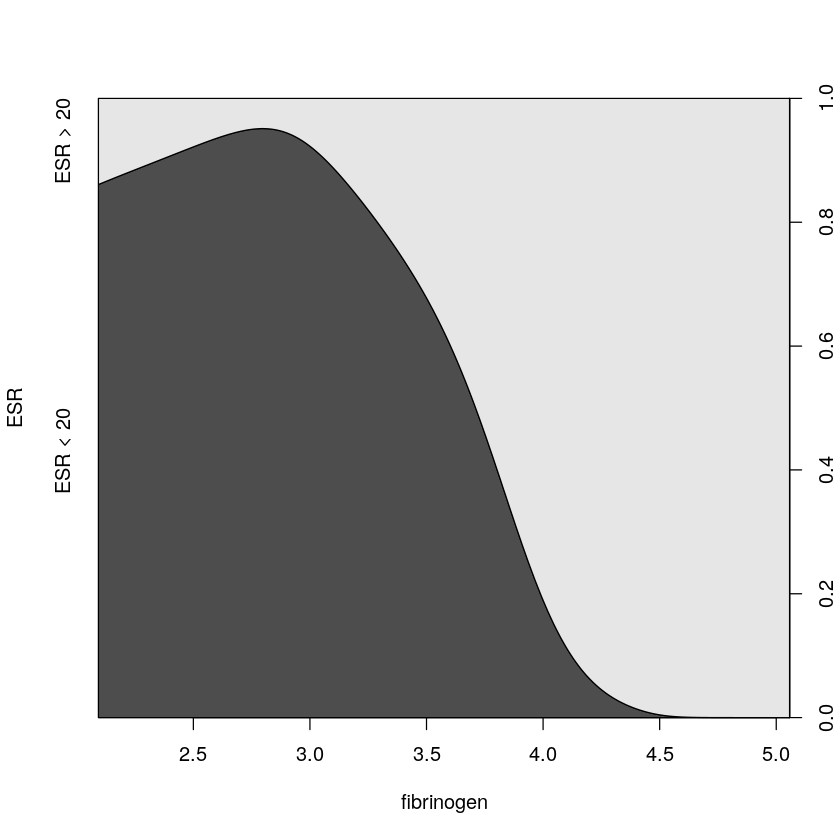

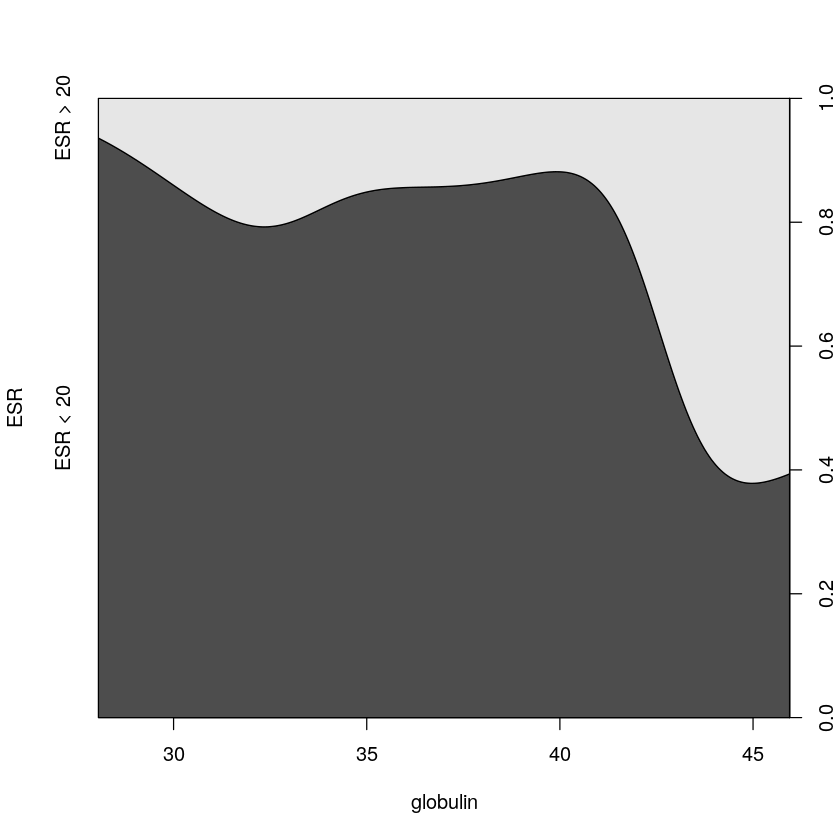

In [6]:
cdplot(ESR ~ fibrinogen, data = plasma)
cdplot(ESR ~ globulin, data = plasma)

#### Fit a logistic regression model

In [15]:
# An intercept is automatically included
plasma.glm.1 <- glm(ESR ~ fibrinogen, data = plasma, family = binomial())
summary(plasma.glm.1)


Call:
glm(formula = ESR ~ fibrinogen, family = binomial(), data = plasma)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9298  -0.5399  -0.4382  -0.3356   2.4794  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -6.8451     2.7703  -2.471   0.0135 *
fibrinogen    1.8271     0.9009   2.028   0.0425 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.885  on 31  degrees of freedom
Residual deviance: 24.840  on 30  degrees of freedom
AIC: 28.84

Number of Fisher Scoring iterations: 5


The coefficient for fibrinogen would be significant at
the 5% level. This coefficient represents the log-odds, meaning that exp($\beta$) is the odds that the response takes value 1 when `fibrinogen` increases by one, when the remaining variables are constant (in this case it's only the intercept, which indeed remains constant). -- See slide 10/36 from w05.

$\frac{p}{1-p} = e^{\beta_0} \cdot e^{\beta_1 \cdot x_1}$

$\log{\frac{p}{1-p}} = {\beta_0} + {\beta_1 \cdot x_1}$

In [38]:
# Computes confidence intervals for one or more parameters
# in a fitted model.
# There is a default and a method for objects inheriting from
# class "lm".
confint(plasma.glm.1, parm = "fibrinogen")

# This is big because we don't have a lot of data

Waiting for profiling to be done...


2.5 %    97.5 % 
0.3387619 3.9984921

In [39]:
exp(coef(plasma.glm.1)["fibrinogen"])
exp(confint(plasma.glm.1, parm = "fibrinogen"))

# This is bigger because of the exponential

fibrinogen 
  6.215715

Waiting for profiling to be done...


2.5 %    97.5 % 
 1.403209 54.515884

We can see that the confidence interval is very wide. Can you think of any reason why this might be?

because odds ratios are non-linear?

Now, fit a logistic regression model using both explanatory variables:


In [22]:
plasma.glm.2 <- glm(ESR ~ fibrinogen + globulin, data = plasma, family = binomial())
summary(plasma.glm.2)


Call:
glm(formula = ESR ~ fibrinogen + globulin, family = binomial(), 
    data = plasma)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9683  -0.6122  -0.3458  -0.2116   2.2636  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -12.7921     5.7963  -2.207   0.0273 *
fibrinogen    1.9104     0.9710   1.967   0.0491 *
globulin      0.1558     0.1195   1.303   0.1925  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.885  on 31  degrees of freedom
Residual deviance: 22.971  on 29  degrees of freedom
AIC: 28.971

Number of Fisher Scoring iterations: 5


The coefficient for gamma globulin is not significantly different from 0 at the 5% level.

Perform a likelihood ratio (chi-square) test by:
1. Subtracting the residual deviance of the second model from that of the first model
2. Comparing the result to a chi-square distribution with degrees of freedom equal to the difference in degrees of freedom between the two models:

In [24]:
anova(plasma.glm.1, plasma.glm.2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
30,24.84036,NA,NA,NA
29,22.97111,1,1.869242,0.1715619


$H_0$: The models are the same. The only way for them to be the same is that the parameter for `globulin` is 0.

p-value $=$ 0 $\Rightarrow$ I reject $H_0$, meaning that the models are different and therefore the parameter for `globulin` is $\neq$ 0.

p-value $\neq$ 0 $\Rightarrow$ I can't reject $H_0$, meaning that the models are not different and therefore the parameter for `globulin` is 0.

In [27]:
# Obtain estimated conditional probability of
# an ESR value larger than 20
prob <- predict(plasma.glm.2, type = "response")

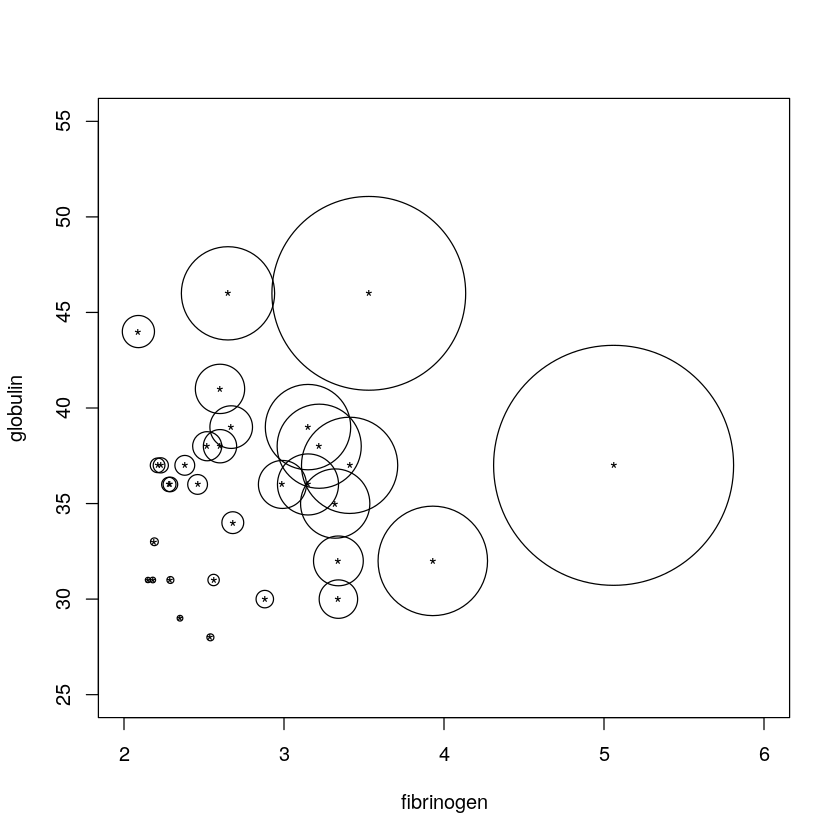

In [30]:
# assign a larger circle to observations with larger probability
plot(globulin ~ fibrinogen, data = plasma, xlim = c(2,6), ylim = c(25,55), pch = "*")
symbols(plasma$fibrinogen, plasma$globulin, circles = prob, add = TRUE)

# Colon polyps data

In [31]:
data("polyps", package = "HSAUR3")
polyps.glm.1 <- glm(number ~ treat + age, data = polyps, family = poisson())

In [34]:
polyps

number,treat,age
63,placebo,20
2,drug,16
28,placebo,18
17,drug,22
61,placebo,13
1,drug,23
7,placebo,34
15,placebo,50
44,placebo,19
25,drug,17


In [32]:
summary(polyps.glm.1)


Call:
glm(formula = number ~ treat + age, family = poisson(), data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2212  -3.0536  -0.1802   1.4459   5.8301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.529024   0.146872   30.84  < 2e-16 ***
treatdrug   -1.359083   0.117643  -11.55  < 2e-16 ***
age         -0.038830   0.005955   -6.52 7.02e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.54  on 17  degrees of freedom
AIC: 273.88

Number of Fisher Scoring iterations: 5


Does there seem to be a larger variance in observed counts than expected from the Poisson
assumption? How can you tell?

Yes, we can tell because residual deviance is much larger than the number of degrees of freedom as we can see from the line:

`Residual deviance: 179.54  on 17  degrees of freedom`

Now use the quasi-likelihood approach to deal with this over-dispersion, by specifying the quasipoisson family:

In [36]:
polyps.glm.2 <- glm(number ~ treat + age, data = polyps, family = quasipoisson())

In [37]:
summary(polyps.glm.2)


Call:
glm(formula = number ~ treat + age, family = quasipoisson(), 
    data = polyps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2212  -3.0536  -0.1802   1.4459   5.8301  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.52902    0.48106   9.415 3.72e-08 ***
treatdrug   -1.35908    0.38533  -3.527  0.00259 ** 
age         -0.03883    0.01951  -1.991  0.06284 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 10.72805)

    Null deviance: 378.66  on 19  degrees of freedom
Residual deviance: 179.54  on 17  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


The drug treatment appears to be effective in reducing the number of polyps, and the age of the patient is not significant at a significance level of 5%.

#### important info!

Negative binomial -- poisson but parameters are allowed to vary.

This is best, could be used all the time, but only as long as we have enough data.